In [18]:
import numpy as np
import xml.etree.ElementTree as ET

tree = ET.parse('./annotate/frame1007.xml')
root = tree.getroot()

file_name = root.find('filename').text
print(file_name)
object_a = root.findall("object")

rows = []
# iterate through each node of the tree
for node in object_a :
    n_name = node.find("name").text
    n_xmin = node.find("bndbox")[0].text
    n_ymin = node.find("bndbox")[1].text
    n_xmax = node.find("bndbox")[2].text
    n_ymax = node.find("bndbox")[3].text
    rows.append({"name": n_name, 
                 "xmin": n_xmin, 
                 "ymin": n_ymin, 
                 "xmax": n_xmax, 
                 "ymax": n_ymax})
 
file_ = np.array(rows)
print(file_)

frame1007.jpg
[{'name': 'dragon', 'xmin': '2', 'ymin': '193', 'xmax': '91', 'ymax': '306'}
 {'name': 'dragon', 'xmin': '1570', 'ymin': '356', 'xmax': '1679', 'ymax': '443'}
 {'name': 'dragon', 'xmin': '1553', 'ymin': '274', 'xmax': '1674', 'ymax': '376'}
 {'name': 'dragon', 'xmin': '1555', 'ymin': '421', 'xmax': '1659', 'ymax': '545'}
 {'name': 'zilot', 'xmin': '1408', 'ymin': '464', 'xmax': '1469', 'ymax': '550'}
 {'name': 'zilot', 'xmin': '1275', 'ymin': '284', 'xmax': '1339', 'ymax': '372'}
 {'name': 'zilot', 'xmin': '536', 'ymin': '636', 'xmax': '608', 'ymax': '717'}
 {'name': 'zilot', 'xmin': '593', 'ymin': '688', 'xmax': '658', 'ymax': '764'}
 {'name': 'zilot', 'xmin': '707', 'ymin': '706', 'xmax': '777', 'ymax': '783'}
 {'name': 'zilot', 'xmin': '679', 'ymin': '610', 'xmax': '742', 'ymax': '691'}
 {'name': 'zilot', 'xmin': '1338', 'ymin': '313', 'xmax': '1411', 'ymax': '394'}
 {'name': 'zilot', 'xmin': '1586', 'ymin': '108', 'xmax': '1654', 'ymax': '184'}
 {'name': 'zilot', 'xmi

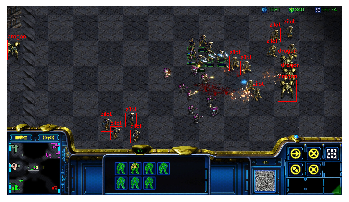

In [19]:
import cv2 
import matplotlib.pyplot as plt

path = './images/'

img = cv2.imread(path + file_name)
for i in file_ :
    name = i['name']
    xmin = int(i['xmin'])
    ymin = int(i['ymin'])
    xmax = int(i['xmax'])
    ymax = int(i['ymax'])
    red = (0, 0, 255) 
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), red, thickness=1)
    img = cv2.putText(img, name,(xmin,ymin-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)

middle_name = file_name.split('.')[0]
cv2.imwrite('test_' + middle_name + '.jpg', img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [73]:
# 각 속성 마다 list로 저장 
# file_name = root.find('filename').text

# name = [x.findtext("name") for x in object_a]

# xmin = [x.find("bndbox")[0].text for x in object_a]
# ymin = [x.find("bndbox")[1].text for x in object_a]
# xmax = [x.find("bndbox")[2].text for x in object_a]
# ymax = [x.find("bndbox")[3].text for x in object_a]

# print(file_name)
# print(name)
# print(xmin)
# print(ymin)
# print(xmax)
# print(ymax)